In [1]:
# Cell 1: Import libraries and test CUDA
import torch
import snntorch as snn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print(f"PyTorch version: {torch.__version__}")
print(f"SNNTorch version: {snn.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")
    cuda_capability = torch.cuda.get_device_capability(0)
    print(f"CUDA capability: {cuda_capability[0]}.{cuda_capability[1]}")

PyTorch version: 2.5.1
SNNTorch version: 0.9.4
CUDA available: True
CUDA device: NVIDIA GeForce RTX 4060 Ti
CUDA capability: 8.9


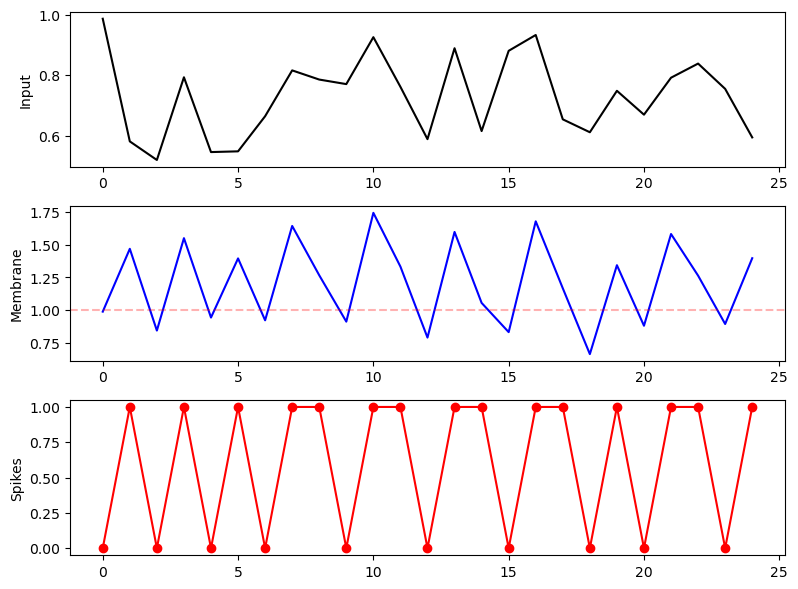

In [2]:
# Cell 2: Simple SNN visualization
# Create network
num_steps = 25
beta = 0.9  # Decay rate

# Initialize LIF neuron
lif1 = snn.Leaky(beta=beta)

# Create inputs (simulated current input over time)
x = 0.5 * torch.ones(num_steps) + 0.5 * torch.rand(num_steps)
x = x.cuda() if torch.cuda.is_available() else x

# Record membrane potential and spikes
mem_rec = []
spk_rec = []

# Initial membrane and spike
mem = torch.zeros(1)
mem = mem.cuda() if torch.cuda.is_available() else mem
spk = torch.zeros(1)

# Neuron loop
for step in range(num_steps):
    spk, mem = lif1(x[step], mem)
    mem_rec.append(mem.item())
    spk_rec.append(spk.item())

# Visualize
fig, ax = plt.subplots(3, figsize=(8, 6))
ax[0].plot(x.cpu().numpy(), 'k')
ax[0].set_ylabel('Input')

ax[1].plot(mem_rec, 'b')
ax[1].axhline(y=1.0, linestyle='--', color='r', alpha=0.3)
ax[1].set_ylabel('Membrane')

ax[2].plot(spk_rec, 'r', marker='o')
ax[2].set_ylabel('Spikes')

plt.tight_layout()
plt.show()